In [6]:
import json
import numpy as np
import glob
import os

import matplotlib.pyplot as plt
import seaborn as sns

from dredFISH.Analysis.__init__plots import *
from dredFISH.Analysis import basicu 
# from dredFISH.Analysis import powerplots
# from dredFISH.Design.model import *
# from dredFISH.Design.allen_data_iterators import DataIterCached

In [8]:
f = '/bigstore/binfo/mouse/Brain/DRedFISH/Allen_V3_Reference' + '/10X/genes.npy' 
tenx_genes = np.load(f)
f = '/bigstore/binfo/mouse/Brain/DRedFISH/Allen_V3_Reference' + '/SmartSeq/genes.npy' 
smrt_genes = np.load(f)

np.all(tenx_genes == smrt_genes)

genes = tenx_genes
genes.shape

(10861,)

In [16]:
rootdat_dir = '/bigstore/GeneralStorage/fangming/projects/dredfish/res_nn/' 
!ls $rootdat_dir

# fig_dir = '/bigstore/GeneralStorage/fangming/projects/dredfish/figures'

00_test_recon		     05-1_drprt0.0  05-1_drprt0.8
01_test_recon		     05-1_drprt0.1  05-1_drprt0.9
02-2_reduced_class_longiter  05-1_drprt0.2  06-gene140
02_reduced_class	     05-1_drprt0.3  06-gene140_lmd01.00e-05
03-1_gpu		     05-1_drprt0.4  07-crse
03-2_cpu		     05-1_drprt0.5  07-fine
04-1_gpu		     05-1_drprt0.6
04-2_cpu		     05-1_drprt0.7


In [22]:
# !ls $dat_dir
dat_dir = rootdat_dir + '05-1_drprt0.0'

In [23]:
# embmat
f = glob.glob(os.path.join(dat_dir, 'embmat*'))[0]
with open(f, 'r') as fh:
    embmat = np.array(json.load(fh))
    print(embmat.shape)

(10861, 24)


In [24]:
# stats
f = glob.glob(os.path.join(dat_dir, 'result*'))[0]
with open(f, 'r') as fh:
    res = json.load(fh)

# get stats processed
_x = []
_y1 = []
_y2 = []
_y3 = []
_y4 = []
for _iter in res.keys():
    _x.append(_iter)
    _y1.append(np.mean([val for key, val in res[_iter]['smrt_crse_acc'].items()]))
    _y2.append(np.mean([val for key, val in res[_iter]['tenx_crse_acc'].items()]))
    _y3.append(np.mean([val for key, val in res[_iter]['smrt_fine_acc'].items()]))
    _y4.append(np.mean([val for key, val in res[_iter]['tenx_fine_acc'].items()]))
_x = np.array(_x).astype(int)

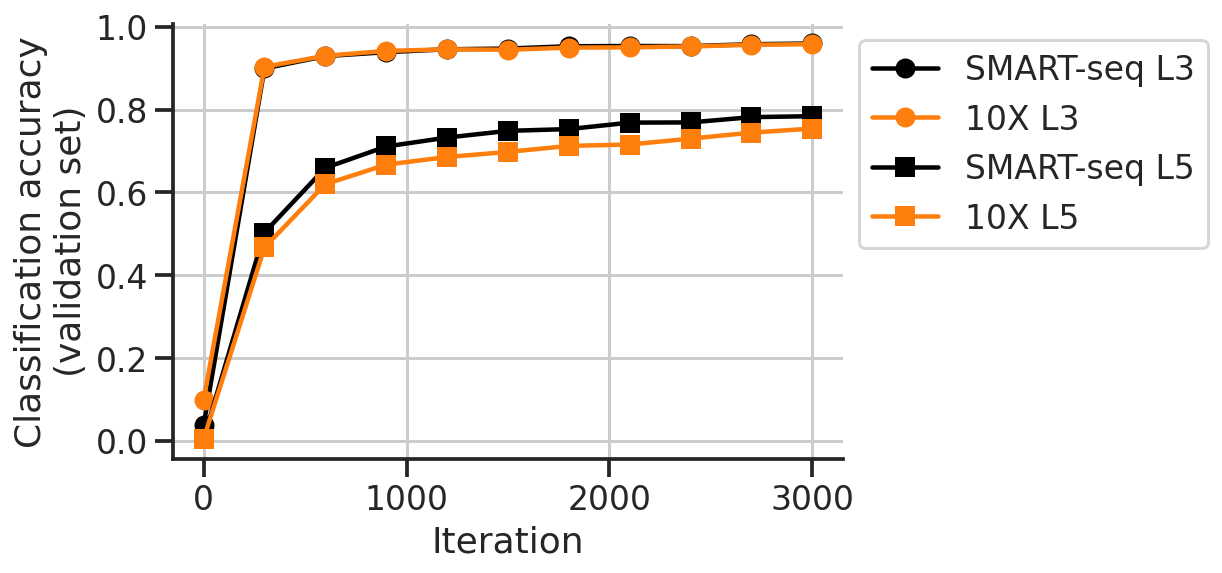

In [25]:
fig, ax = plt.subplots()
ax.plot(_x, _y1, '-o', color='k', label='SMART-seq L3')
ax.plot(_x, _y2, '-o', color='C1', label='10X L3' )
ax.plot(_x, _y3, '-s', color='k', label='SMART-seq L5')
ax.plot(_x, _y4, '-s', color='C1', label='10X L5' )
ax.set_xlabel('Iteration')
ax.set_ylabel('Classification accuracy\n(validation set)')
ax.legend(bbox_to_anchor=(1,1))
sns.despine(ax=ax)
# powerplots.savefig_autodate(fig, os.path.join(fig_dir, "NN_classification_acc.pdf"))
plt.show()

# go across many dropouts

In [38]:
# !ls $dat_dir
stats = {}
for i in np.arange(0, 1, 0.1):
    dat_dir = rootdat_dir + f'05-1_drprt{i:.1f}'
    print(dat_dir)
    
    # stats
    f = glob.glob(os.path.join(dat_dir, 'result*'))[0]
    with open(f, 'r') as fh:
        res = json.load(fh)

    # get stats processed
    _x = []
    _y1 = []
    _y2 = []
    _y3 = []
    _y4 = []
    for _iter in res.keys():
        _x.append(_iter)
        _y1.append(np.mean([val for key, val in res[_iter]['smrt_crse_acc'].items()]))
        _y2.append(np.mean([val for key, val in res[_iter]['tenx_crse_acc'].items()]))
        _y3.append(np.mean([val for key, val in res[_iter]['smrt_fine_acc'].items()]))
        _y4.append(np.mean([val for key, val in res[_iter]['tenx_fine_acc'].items()]))
    _x = np.array(_x).astype(int)
    
    key = f'{i:.1f}'
    stats[key] = [_x, _y1, _y2, _y3, _y4]

/bigstore/GeneralStorage/fangming/projects/dredfish/res_nn/05-1_drprt0.0
/bigstore/GeneralStorage/fangming/projects/dredfish/res_nn/05-1_drprt0.1
/bigstore/GeneralStorage/fangming/projects/dredfish/res_nn/05-1_drprt0.2
/bigstore/GeneralStorage/fangming/projects/dredfish/res_nn/05-1_drprt0.3
/bigstore/GeneralStorage/fangming/projects/dredfish/res_nn/05-1_drprt0.4
/bigstore/GeneralStorage/fangming/projects/dredfish/res_nn/05-1_drprt0.5
/bigstore/GeneralStorage/fangming/projects/dredfish/res_nn/05-1_drprt0.6
/bigstore/GeneralStorage/fangming/projects/dredfish/res_nn/05-1_drprt0.7
/bigstore/GeneralStorage/fangming/projects/dredfish/res_nn/05-1_drprt0.8
/bigstore/GeneralStorage/fangming/projects/dredfish/res_nn/05-1_drprt0.9


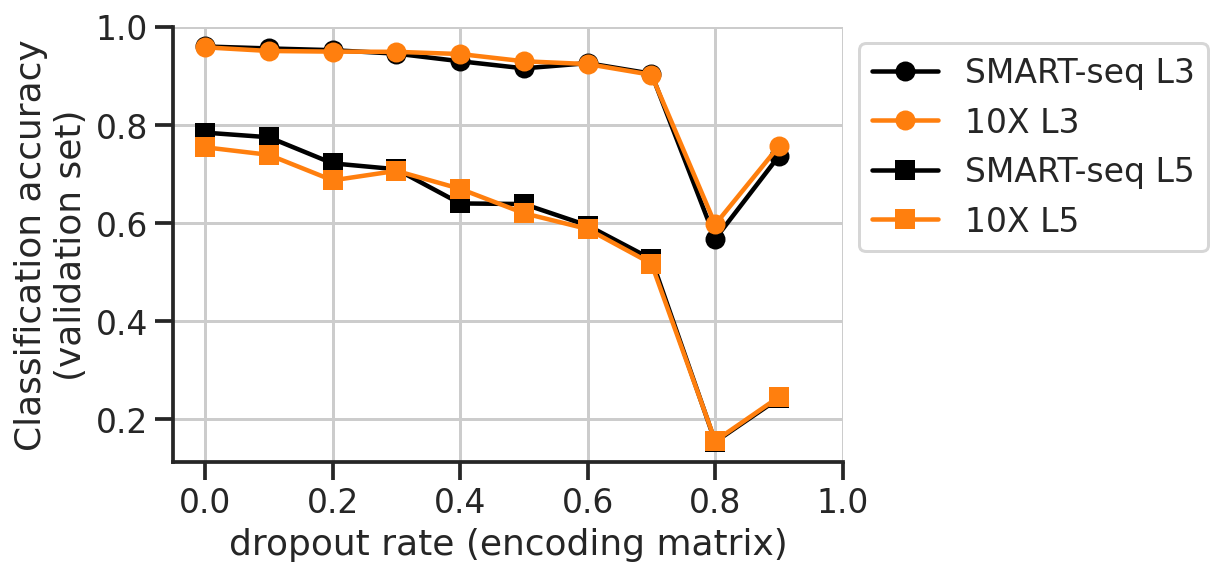

In [47]:
y1_cmb = []
y2_cmb = []
y3_cmb = []
y4_cmb = []
drprts = []
for drprt, vals in stats.items():
    _x, _y1, _y2, _y3, _y4 = vals
    drprts.append(float(drprt))
    y1_cmb.append(_y1[-1])
    y2_cmb.append(_y2[-1])
    y3_cmb.append(_y3[-1])
    y4_cmb.append(_y4[-1])
    

fig, ax = plt.subplots()
ax.plot(drprts, y1_cmb, '-o', color='k', label='SMART-seq L3')
ax.plot(drprts, y2_cmb, '-o', color='C1', label='10X L3' )

ax.plot(drprts, y3_cmb, '-s', color='k', label='SMART-seq L5')
ax.plot(drprts, y4_cmb, '-s', color='C1', label='10X L5' )
    
ax.set_xlim([-0.05,1])
ax.set_xlabel('dropout rate (encoding matrix)')
ax.set_ylabel('Classification accuracy\n(validation set)')
ax.legend(bbox_to_anchor=(1,1))
sns.despine(ax=ax)
# powerplots.savefig_autodate(fig, os.path.join(fig_dir, "NN_classification_acc.pdf"))
plt.show()